Bike Share Prediction

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype


In [8]:
df = pd.read_csv("../data/bikeshare_train.csv")

In [9]:
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [10]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [11]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [13]:
df2 = df.copy()


C:\Users\Guy\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Guy\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Guy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Guy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: 

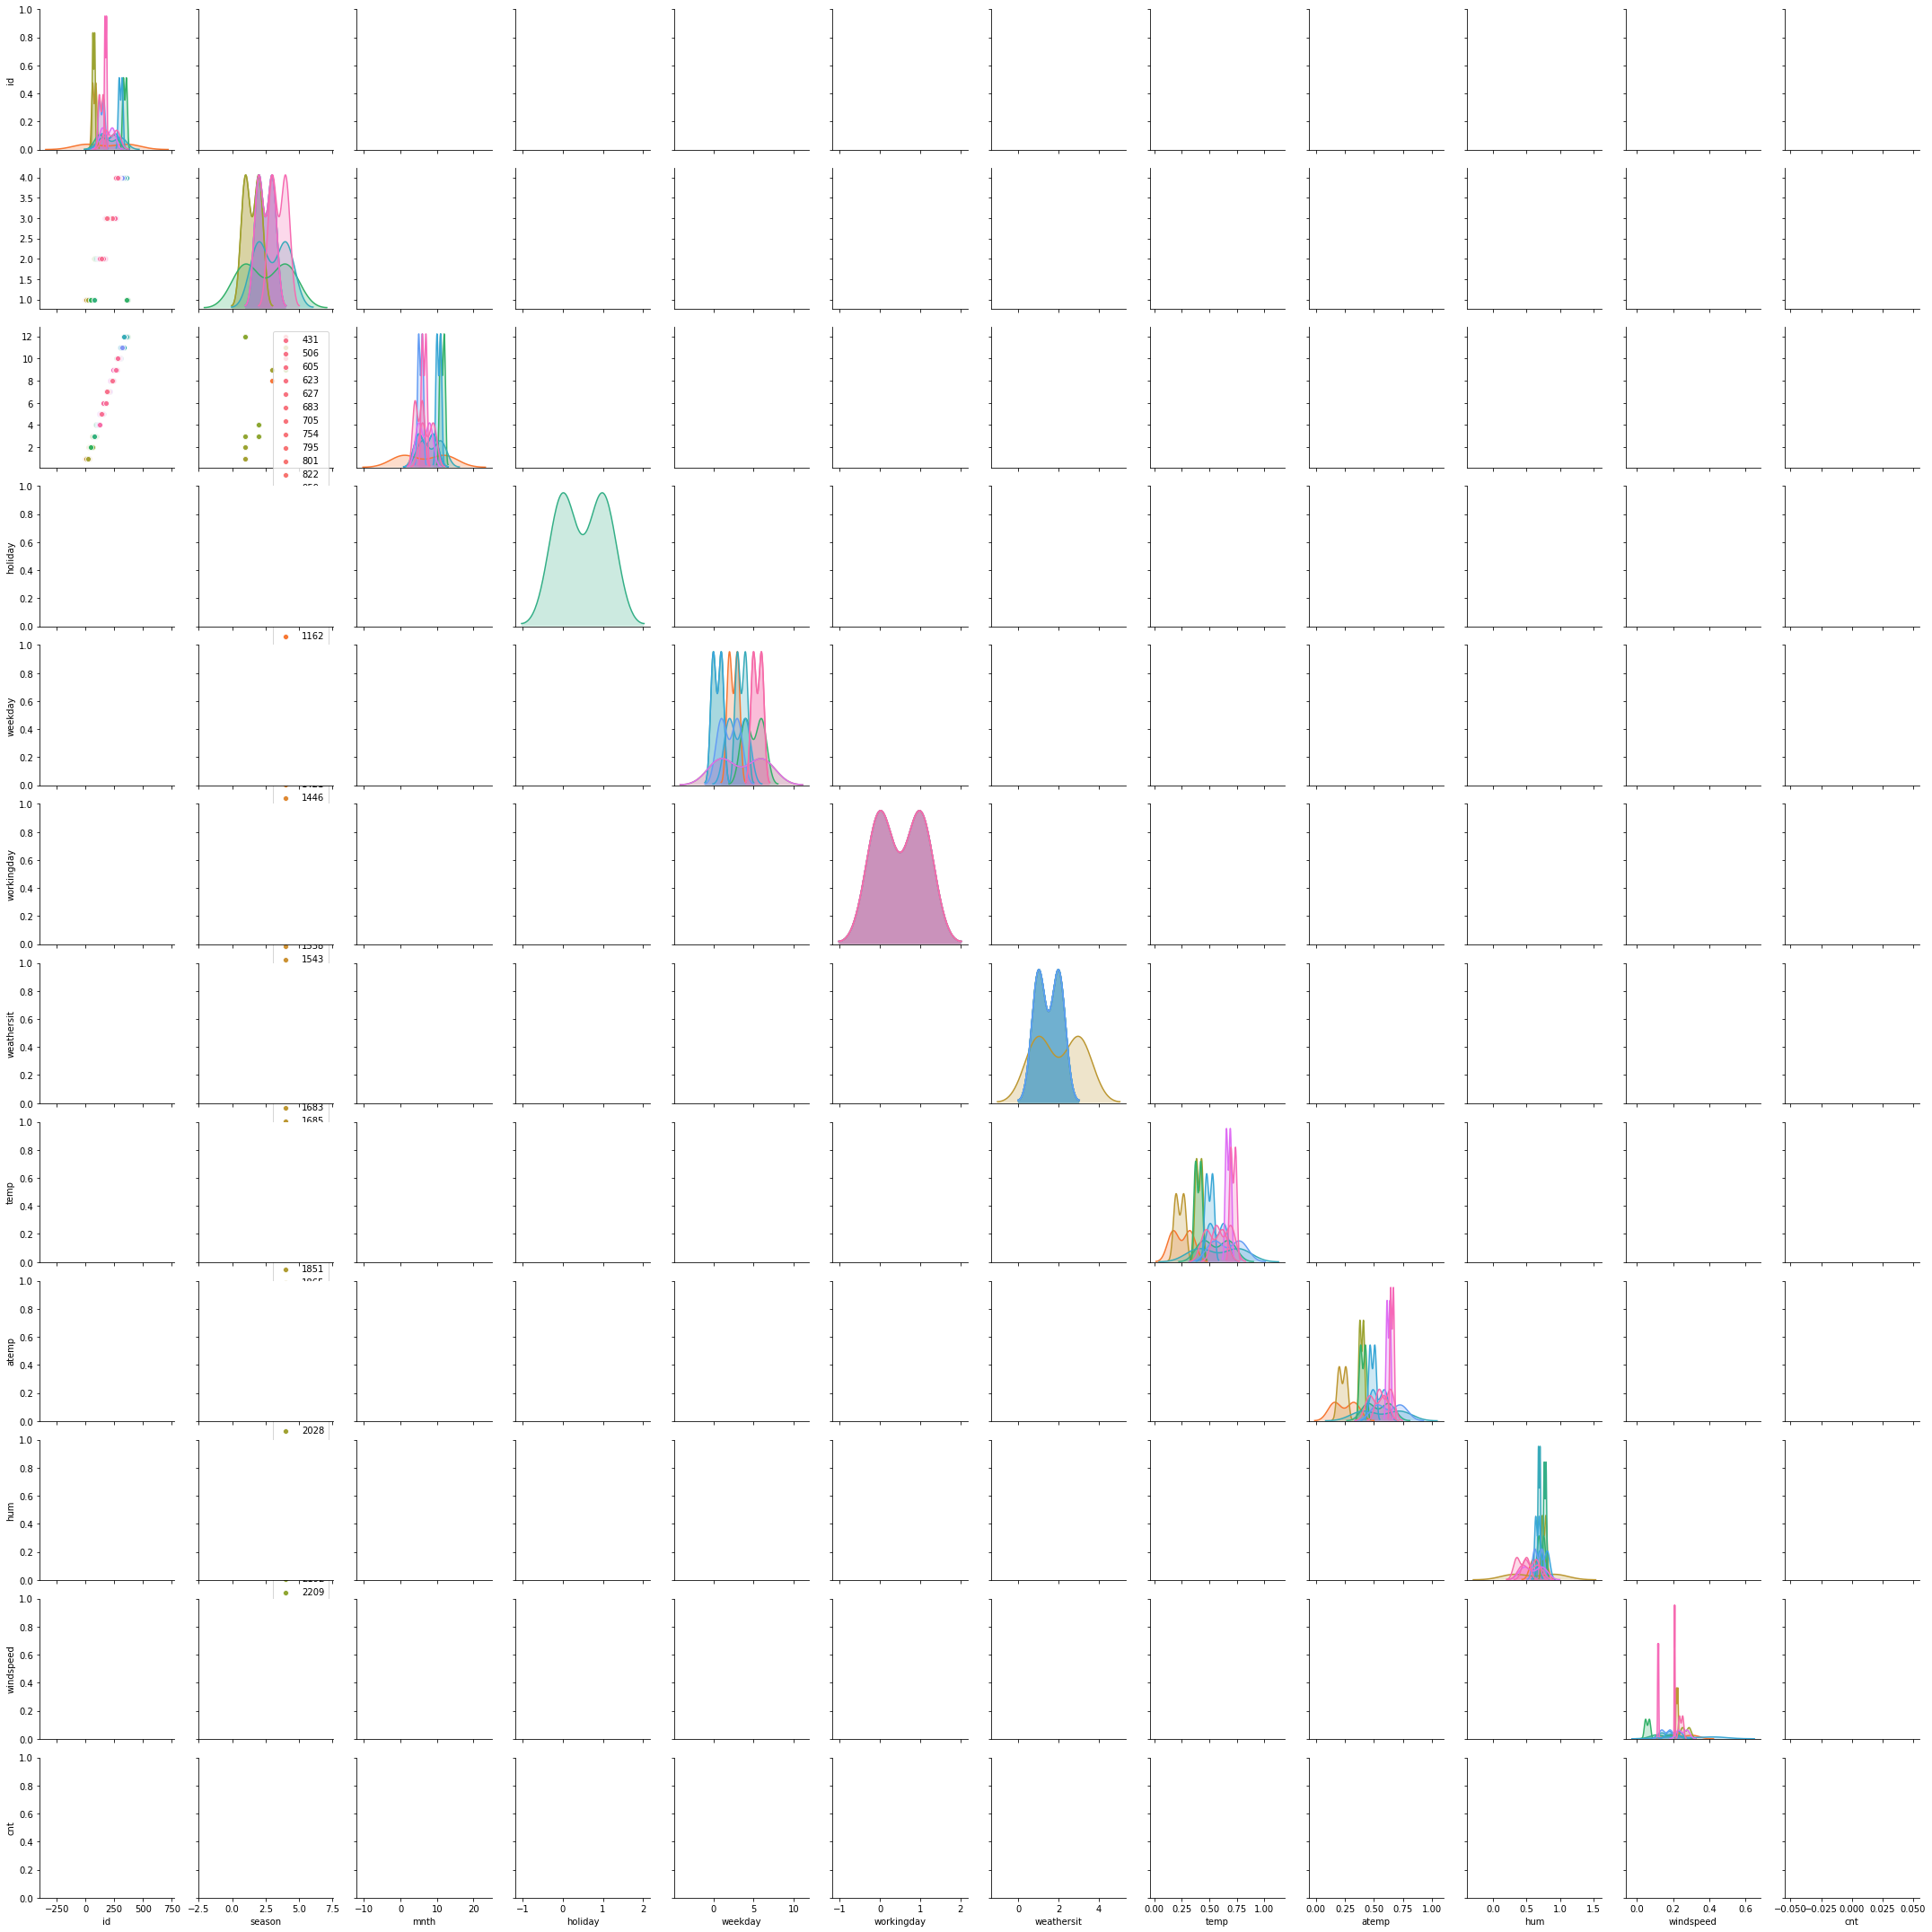

In [14]:
sns.pairplot(df2,hue="cnt")

## k-means

In [15]:
from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.iloc[:,0:10])
    wcss.append(kmeans.inertia_)
    

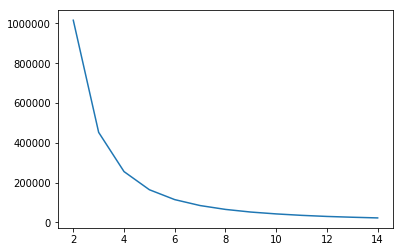

In [17]:
#because x=4 has a peak we choose 6 as the number of clusters 
sns.lineplot(x=range(2, 15), y=wcss)

In [18]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df.iloc[:,0:10])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
df2['cluster'] = kmeans.labels_

C:\Users\Guy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Guy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


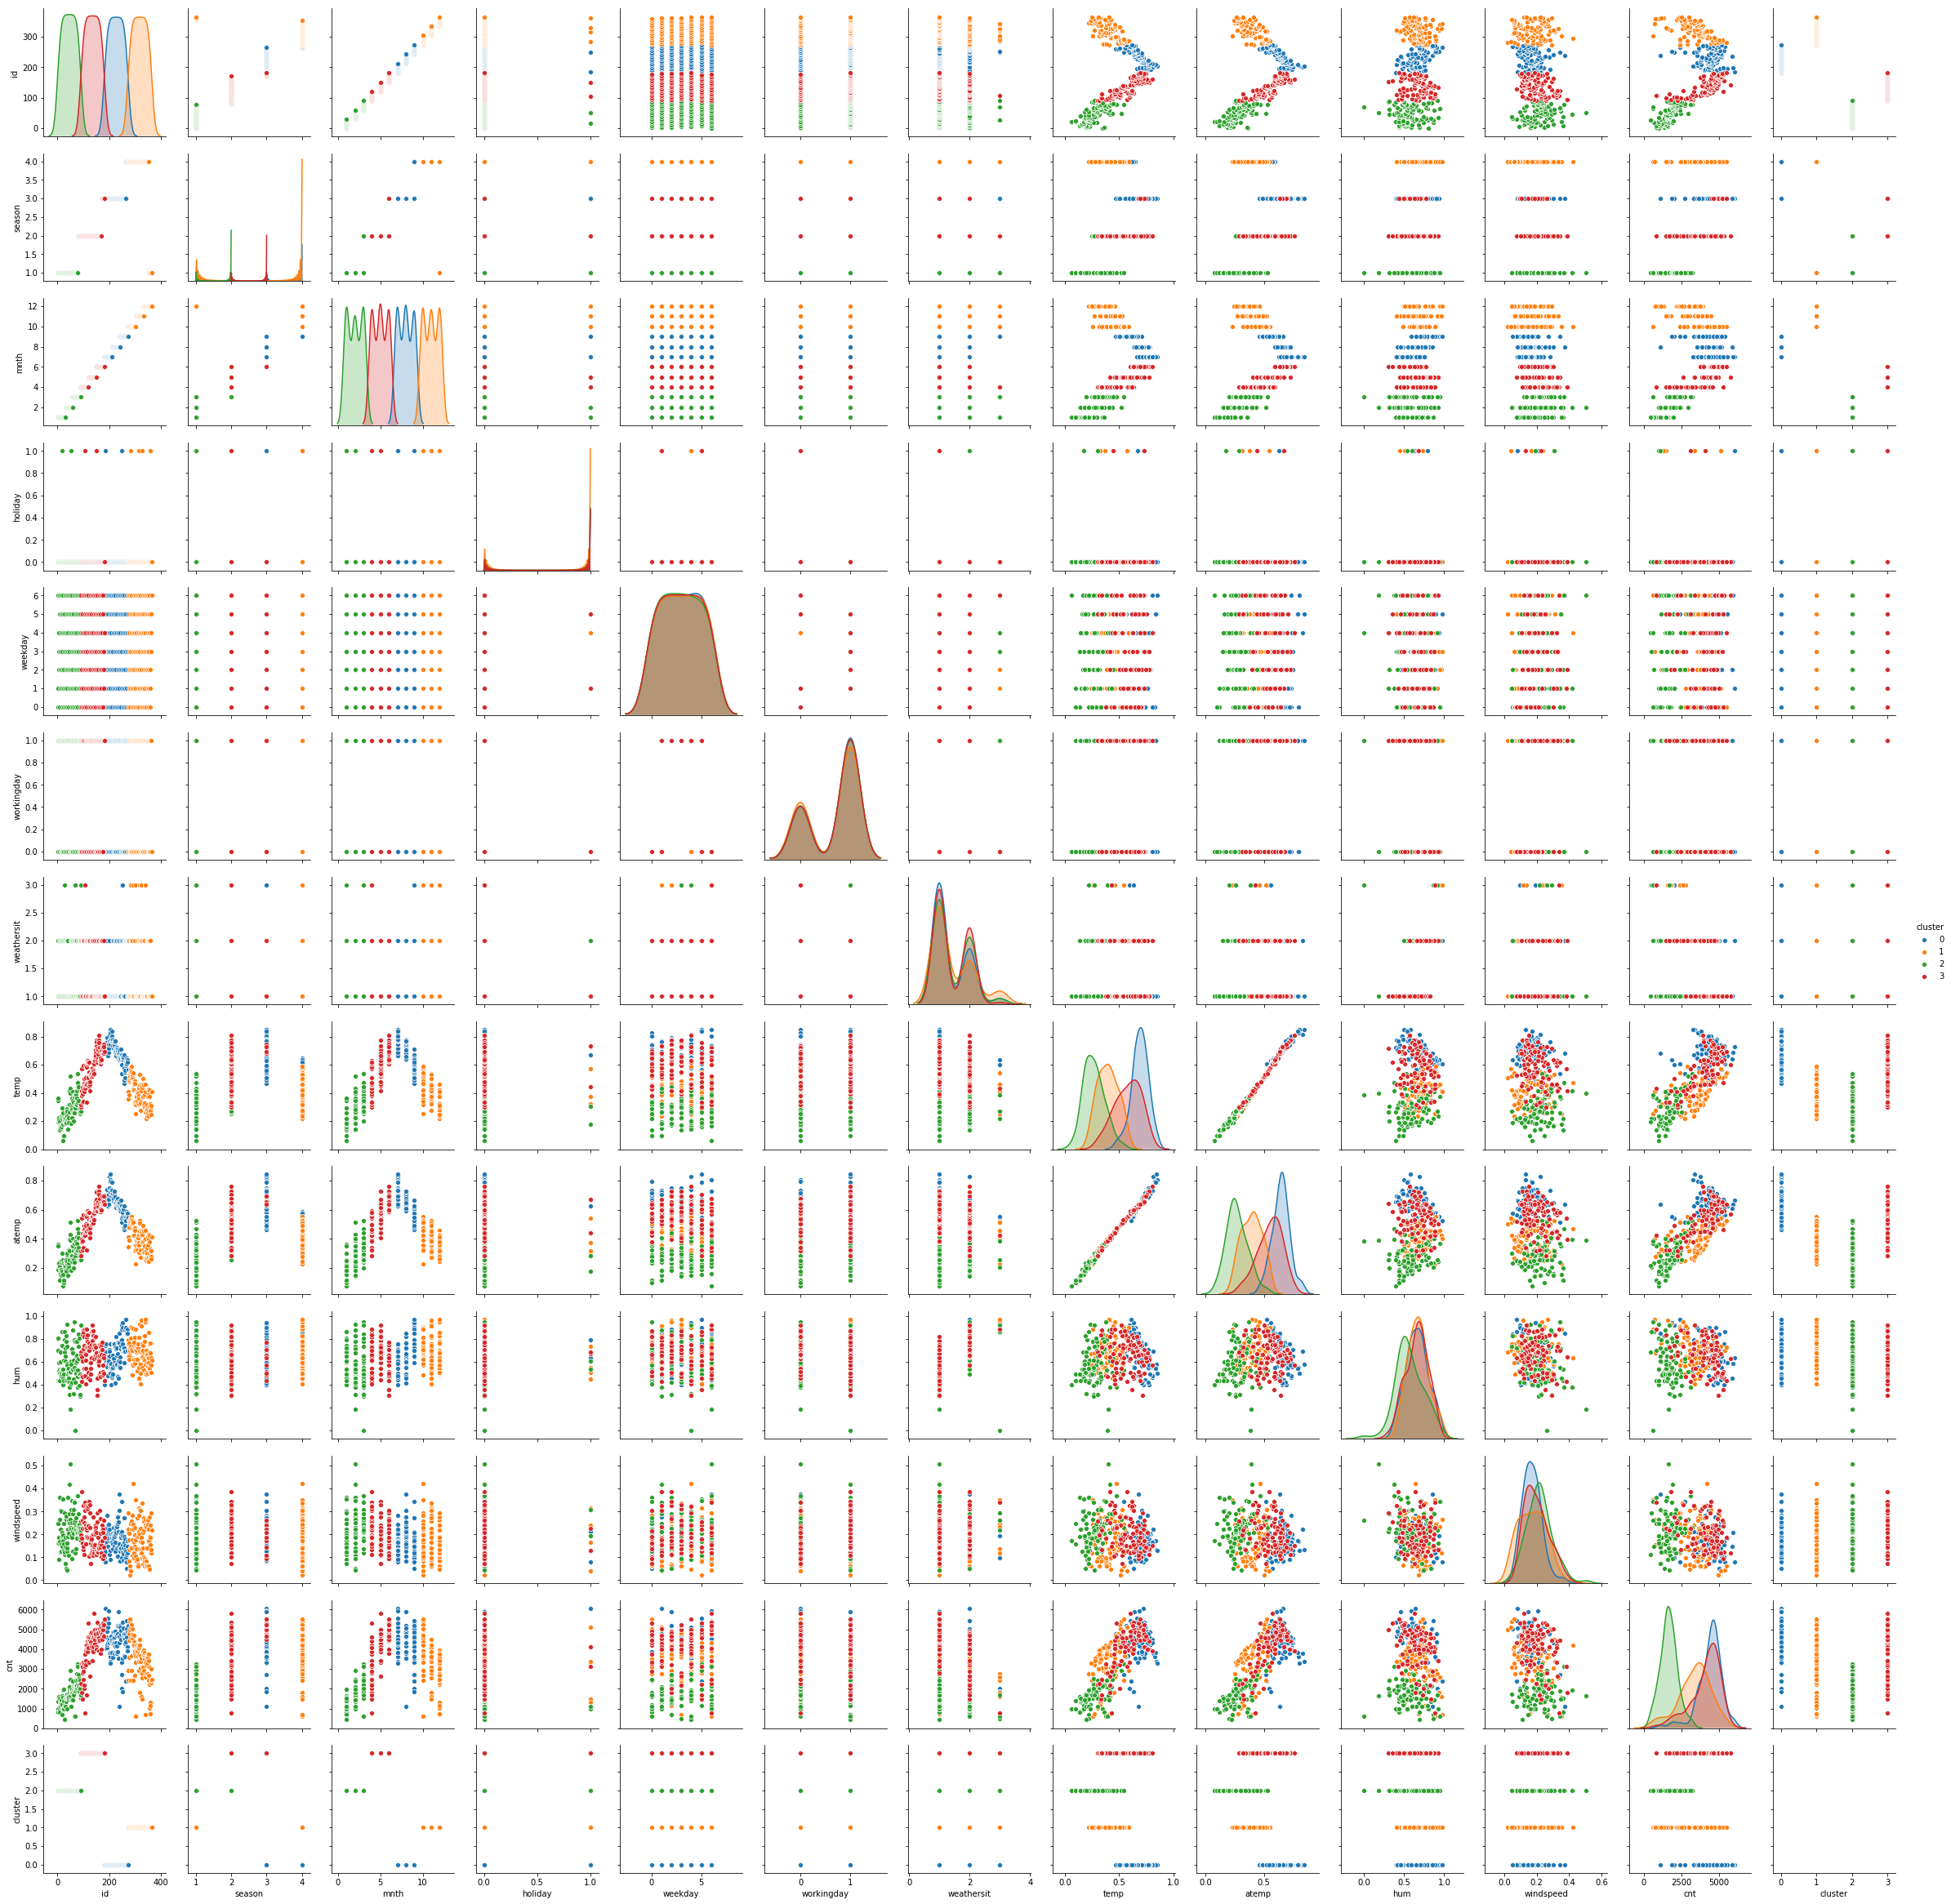

In [20]:
sns.pairplot(df2,hue="cluster")

In [22]:
pd.crosstab(df2.cluster,df2.cnt)

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
cluster,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,1
1,0,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster

In [24]:
linked = linkage(df.iloc[:,0:10], 'ward')

labelList = range(2, 15)

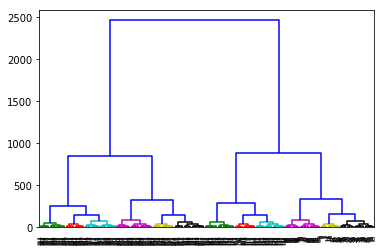

In [25]:
dn = dendrogram(linked,color_threshold=120)


In [26]:
df2['hcluster'] = fcluster(linked, 4, criterion='maxclust')

In [27]:
pd.crosstab(df2.hcluster,df2.cnt)

cnt,431,506,605,623,627,683,705,754,795,801,...,5362,5409,5423,5511,5515,5538,5805,5895,5923,6043
hcluster,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,1,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pd.crosstab(df2.cluster,df2.hcluster)

hcluster,1,2,3,4
cluster,,,,
0,0,88,4,0
1,84,8,0,0
2,0,0,0,90
3,0,0,84,7


In [29]:
df2.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster,hcluster
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644,1.493151,2.542466
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666,1.120774,1.115071
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000,0.000000,1.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000,0.000000,2.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000,1.000000,3.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000,2.000000,4.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000,3.000000,4.000000


In [30]:
df2.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster,hcluster
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2,4
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2,4
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2,4
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,2,4
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,2,4


# Partition of the data

In [31]:
from sklearn.model_selection import train_test_split

In [261]:
nv = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
nc = ['cluster','hcluster']
yv = 'Classification'

In [262]:
X = df2.loc[:,nv]
y = df2.Classification

In [263]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [264]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: category
Categories (2, int64): [1, 2]

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)


# Models

### Logistic Regression

In [253]:
from sklearn.linear_model import LogisticRegression

In [284]:
mod1 = LogisticRegression()
mod1.fit(X_train,y_train)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
yhat1 = mod1.predict(X_train)
yhat1

array([1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1])

In [286]:
yprob1 = mod1.predict_proba(X_train)
yprob1

array([[5.79487604e-01, 4.20512396e-01],
       [2.90438214e-01, 7.09561786e-01],
       [3.57005963e-01, 6.42994037e-01],
       [3.25823385e-01, 6.74176615e-01],
       [1.68577954e-01, 8.31422046e-01],
       [6.60247712e-01, 3.39752288e-01],
       [8.61245350e-01, 1.38754650e-01],
       [7.04356294e-01, 2.95643706e-01],
       [2.30371332e-01, 7.69628668e-01],
       [7.23143066e-07, 9.99999277e-01],
       [2.57113550e-02, 9.74288645e-01],
       [9.00468078e-01, 9.95319216e-02],
       [6.29044058e-01, 3.70955942e-01],
       [2.85735354e-02, 9.71426465e-01],
       [3.15996004e-06, 9.99996840e-01],
       [2.26557841e-01, 7.73442159e-01],
       [3.91405032e-01, 6.08594968e-01],
       [1.32085768e-01, 8.67914232e-01],
       [1.50002826e-01, 8.49997174e-01],
       [2.63595591e-01, 7.36404409e-01],
       [4.24231183e-01, 5.75768817e-01],
       [8.61951919e-01, 1.38048081e-01],
       [3.07628227e-01, 6.92371773e-01],
       [7.20419762e-01, 2.79580238e-01],
       [2.483831

In [287]:
pd.crosstab(y_train,yhat1)

/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


col_0,1,2
Classification,,
1,19,11
2,7,32


In [288]:
### Accuracy:
mod1.score(X_train,y_train)

0.7391304347826086

In [290]:
### AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, yhat1))
print(roc_auc_score(y_test, yhat2))

0.7269230769230769
0.7327272727272727


In [289]:
yhat2 = mod1.predict(X_test)
print(mod1.score(X_test,y_test))
pd.crosstab(y_test,yhat2)

0.7446808510638298


/home/tomas/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/missing.py:277: FutureWarning: Categorical.ravel will return a Categorical object instead of an ndarray in a future version.
  vec = libmissing.isnaobj_old(values.ravel())


col_0,1,2
Classification,,
1,12,10
2,2,23


In [292]:
res = {1:{'model':'Logistic Regression - base model',
           'accuracy-Train':mod1.score(X_train,y_train),
           'accuracy-Test':mod1.score(X_test,y_test),
           'AUC-train':roc_auc_score(y_train, yhat1),
           'AUC-test':roc_auc_score(y_test, yhat2)
      }}

In [293]:
#res[2] = {'model':'Logistic Regression - base model',
#           'accuracy-Train':mod1.score(X_train,y_train),
#           'accuracy-Test':mod1.score(X_test,y_test),
#           'AUC-train':roc_auc_score(y_train, yhat1),
#           'AUC-test':roc_auc_score(y_test, yhat2)
#      }

In [295]:
res

{1: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727},
 2: {'model': 'Logistic Regression - base model',
  'accuracy-Train': 0.7391304347826086,
  'accuracy-Test': 0.7446808510638298,
  'AUC-train': 0.7269230769230769,
  'AUC-test': 0.7327272727272727}}